In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jun  4 17:11:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:
IMAGE_SIZE = [150, 150]   #threshold = 0.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
workdir_path = '/PATH_PARA_ENTRADA'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], include_top=False) #weights='imagenet'

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# congelando as camadas 
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# criando o head de classificacao
x = Flatten()(vgg.output)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)                  
prediction = Dense(1, activation='sigmoid')(x)   # uma unica saida e nao duas como antes


In [ ]:
# create a model object = vgg + head
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0005), 
              loss = 'binary_crossentropy',    ## troquei
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Acessando algumas imagens

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

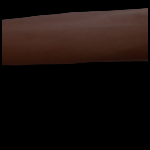

In [ ]:
imagem=load_img('sem/Untitled71_20221024184551.png', target_size=(150,150,3));   # era 224
imagem 

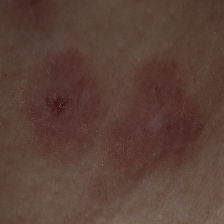

In [ ]:
imagem=load_img('com/face-closeup-SIM/Image-097DA4-face-closeup.jpg', target_size=(224,224,3));   # era 224
imagem

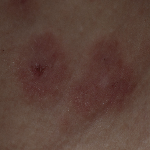

In [ ]:
imagem=load_img('com/face-closeup-SIM/Image-097DA4-face-closeup.jpg', target_size=(150,150,3));   # era 224
imagem

In [ ]:
# listando as imagens com hanseniase,
# que estao em diretorios que comecam com  "COM"
arquivos_com = []
os.chdir(workdir_path)
os.chdir('com')
for pasta in os.listdir():
  #print(f'diretorio {pasta}')
  if pasta.endswith('-SIM'):
    os.chdir(pasta)
    for arquivo in os.listdir():
      arquivos_com.append("com" + "/" + pasta+ "/" + arquivo)
    os.chdir('../')
print(arquivos_com)

['com/face-closeup-SIM/Image-097DA4-face-closeup.jpg', 'com/face-closeup-SIM/Image-228FM1-face-closeup.jpg', 'com/face-closeup-SIM/Image-228FM2-face-closeup.jpg', 'com/face-closeup-SIM/Image-222IS1-face-closeup.jpg', 'com/face-closeup-SIM/Image-191JE1-face-closeup.jpg', 'com/face-closeup-SIM/Image-082RM2-face-closeup.jpg', 'com/face-closeup-SIM/Image-129RP5-face-closeup.jpg', 'com/face-closeup-SIM/Image-130GD1-face-closeup.jpg', 'com/face-closeup-SIM/Image-131JO1-face-closeup.jpg', 'com/face-closeup-SIM/Image-131JO2-face-closeup.jpg', 'com/face-closeup-SIM/Image-131JO3-face-closeup.jpg', 'com/face-closeup-SIM/Image-131JO4-face-closeup.jpg', 'com/face-closeup-SIM/Image-135RC2-face-closeup.jpg', 'com/face-closeup-SIM/Image-140AB3-face-closeup.jpg', 'com/face-closeup-SIM/Image-145MR1-face-closeup.jpg', 'com/face-closeup-SIM/Image-156AS1-face-closeup.jpg', 'com/face-closeup-SIM/Image-164JF1-face-closeup.jpg', 'com/face-edge-SIM/Image-101NP2-face-edge.jpg', 'com/face-edge-SIM/Image-129RP5-f

In [ ]:
len(arquivos_com)

141

In [ ]:
# listando as imagens SEM hanseniase,
# que estao em diretorios que comecam com  "SEM"
arquivos_sem = []
os.chdir(workdir_path)
os.chdir('sem')
for arquivo in os.listdir():
    arquivos_sem.append( 'sem' + "/" + arquivo)
os.chdir('../')
print(arquivos_sem)

['sem/IMG_6889.PNG', 'sem/Untitled71_20221024184551.png', 'sem/Untitled71_20221024184805.png', 'sem/Untitled71_20221024184625.png', 'sem/Untitled71_20221024184611.png', 'sem/Untitled71_20221024184713.png', 'sem/Untitled71_20221024184821.png', 'sem/Untitled71_20221024184451.png', 'sem/Untitled71_20221024184420.png', 'sem/20221105_125119.jpg', 'sem/20221105_125215.jpg', 'sem/20221105_125218.jpg', 'sem/20221105_125225.jpg', 'sem/20221105_125347.jpg', 'sem/20221105_125359.jpg', 'sem/20221105_140545.jpg', 'sem/20221105_140601.jpg', 'sem/20221105_140623.jpg', 'sem/20221105_140630.jpg', 'sem/20221105_150754.jpg', 'sem/20221105_150814.jpg', 'sem/20221105_150924.jpg', 'sem/20221110_211338.jpg', 'sem/20221110_211350.jpg', 'sem/20221110_211515.jpg', 'sem/20221110_211523.jpg', 'sem/20221110_211614.jpg', 'sem/20221110_211623.jpg', 'sem/internet003.jpg', 'sem/internet004.jpg', 'sem/internet005.jpg', 'sem/internet007.jpg', 'sem/internet008.jpg', 'sem/internet009.jpg', 'sem/internet014.jpg', 'sem/inte

In [ ]:
len(arquivos_sem)

38

In [ ]:
##y_col: if class_mode is "binary" or "sparse" it must include the given y_col column with class values as strings.
## x_col: 	string, column in dataframe that contains the filenames (or absolute paths if directory is None). 
df = pd.DataFrame()
df_sem = pd.DataFrame(arquivos_sem,columns =['filename'])
df_sem['class'] = 'sem'
df_com = pd.DataFrame(arquivos_com,columns =['filename'])
df_com['class'] = 'com'
df = df.append(df_com)
df = df.append(df_sem)
df.shape

(179, 2)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1,random_state=42)
print(df_train.shape)
print(df_test.shape)

(161, 2)
(18, 2)


In [ ]:
df_train

,filename,class
68,com/trunk-edge-SIM/Image-192JG1-trunk-edge.jpg,com
118,com/ulimbs-closeup-SIM/Image-084LS3-ulimbs-clo...,com
1,sem/Untitled71_20221024184551.png,sem
30,com/llimbs-edge-SIM/Image-193AS2-llimbs-edge.jpg,com
9,com/face-closeup-SIM/Image-131JO2-face-closeup...,com
...,...,...
71,com/trunk-edge-SIM/Image-101NP6-trunk-edge.jpg,com
106,com/ulimbs-closeup-SIM/Image-197LS2-ulimbs-clo...,com
14,com/face-closeup-SIM/Image-145MR1-face-closeup...,com
92,com/ulimbs-closeup-SIM/Image-127KS1-ulimbs-clo...,com


In [ ]:
df_test

,filename,class
78,com/trunk-edge-SIM/Image-147AS1-trunk-edge.jpg,com
16,com/face-closeup-SIM/Image-164JF1-face-closeup...,com
65,com/trunk-edge-SIM/Image-205IL1-trunk-edge.jpg,com
114,com/ulimbs-closeup-SIM/Image-069PO1-ulimbs-clo...,com
76,com/trunk-edge-SIM/Image-124CG4-trunk-edge.jpg,com
19,com/face-edge-SIM/Image-145MR1-face-edge.jpg,com
122,com/ulimbs-closeup-SIM/Image-088ES3-ulimbs-clo...,com
24,com/llimbs-edge-SIM/Image-218AA1-llimbs-edge.jpg,com
66,com/trunk-edge-SIM/Image-204MB3-trunk-edge.jpg,com
11,sem/20221105_125218.jpg,sem


data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1.0/255.)   # aproveita e faz a normalizacao


train_generator = train_datagen.flow_from_dataframe(df_train,
                                                    x_col='filename',
                                                    y_col='class',
                                                    batch_size = 10,             # era 10
                                                    class_mode = 'binary',  #'binary',   era categorical
                                                    target_size = (150, 150))     # era 224 
# VAI IMPRIMIR A QUANTIDADE DO TRAIN
validation_generator =  test_datagen.flow_from_dataframe( df_test,
                                                          x_col='filename',
                                                          y_col='class',
                                                          batch_size  = 10,           #5,  # era 10
                                                          class_mode  = 'binary', #'binary', 
                                                          target_size = (150, 150))    # era 224
														  

Found 161 validated image filenames belonging to 2 classes.
Found 18 validated image filenames belonging to 2 classes.


# Treinando o modelo

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
#callback = EarlyStopping(monitor='loss', patience=3,verbose=1)
callback = EarlyStopping(monitor = 'val_loss', patience = 5,verbose=1)

In [ ]:
history = model.fit(                        ## forma semelhante ao inception
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 5, #5, #10,   #8  era 20
            epochs = 15,           # 25             #20  era 10
            validation_steps= 5, #5, #10,   #6  era 10
            verbose = 1,
            callbacks=[callback])

Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 1.1898 - accuracy: 0.8537

5/5 [==============================] - 102s 21s/step - loss: 1.1898 - accuracy: 0.8537 - val_loss: 0.9392 - val_accuracy: 0.8889
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 0.7333 - accuracy: 0.8400 

5/5 [==============================] - 58s 11s/step - loss: 0.7333 - accuracy: 0.8400
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 0.5925 - accuracy: 0.6200

5/5 [==============================] - 51s 10s/step - loss: 0.5925 - accuracy: 0.6200
Epoch 4/15
5/5 [==============================] - ETA: 0s - loss: 0.8807 - accuracy: 0.7317

5/5 [==============================] - 38s 7s/step - loss: 0.8807 - accuracy: 0.7317
Epoch 5/15
5/5 [==============================] - ETA: 0s - loss: 0.9186 - accuracy: 0.4800

5/5 [==============================] - 44s 9s/step - loss: 0.9186 - accuracy: 0.4800
Epoch 6/15
5/5 [==============================] - ETA: 0s - loss: 0.7107 - accuracy: 0.7600

5/5 [==============================] - 42s 8s/step - loss: 0.7107 - accuracy: 0.7600
Epoch 7/15
5/5 [==============================] - ETA: 0s - loss: 0.6319 - accuracy: 0.7800

5/5 [==============================] - 41s 8s/step - loss: 0.6319 - accuracy: 0.7800
Epoch 8/15
5/5 [==============================] - ETA: 0s - loss: 0.4206 - accuracy: 0.8537

5/5 [==============================] - 41s 8s/step - loss: 0.4206 - accuracy: 0.8537
Epoch 9/15
5/5 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8600

5/5 [==============================] - 41s 8s/step - loss: 0.4253 - accuracy: 0.8600
Epoch 10/15
5/5 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8049

5/5 [==============================] - 34s 6s/step - loss: 0.3752 - accuracy: 0.8049
Epoch 11/15
5/5 [==============================] - ETA: 0s - loss: 0.5052 - accuracy: 0.8000

5/5 [==============================] - 39s 7s/step - loss: 0.5052 - accuracy: 0.8000
Epoch 12/15
5/5 [==============================] - ETA: 0s - loss: 0.4663 - accuracy: 0.8537

5/5 [==============================] - 34s 6s/step - loss: 0.4663 - accuracy: 0.8537
Epoch 13/15
5/5 [==============================] - ETA: 0s - loss: 0.3198 - accuracy: 0.8537

5/5 [==============================] - 34s 6s/step - loss: 0.3198 - accuracy: 0.8537
Epoch 14/15
5/5 [==============================] - ETA: 0s - loss: 0.9214 - accuracy: 0.7800

5/5 [==============================] - 40s 7s/step - loss: 0.9214 - accuracy: 0.7800
Epoch 15/15
5/5 [==============================] - ETA: 0s - loss: 0.3552 - accuracy: 0.8200

5/5 [==============================] - 43s 8s/step - loss: 0.3552 - accuracy: 0.8200


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(acc)
print(val_acc)

[0.8536585569381714, 0.8399999737739563, 0.6200000047683716, 0.7317073345184326, 0.47999998927116394, 0.7599999904632568, 0.7799999713897705, 0.8536585569381714, 0.8600000143051147, 0.8048780560493469, 0.800000011920929, 0.8536585569381714, 0.8536585569381714, 0.7799999713897705, 0.8199999928474426]
[0.8888888955116272]


In [ ]:
epochs = range(len(acc))

def PlotHistory(history):    
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


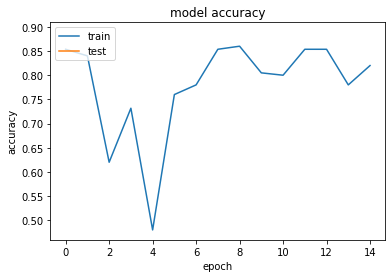

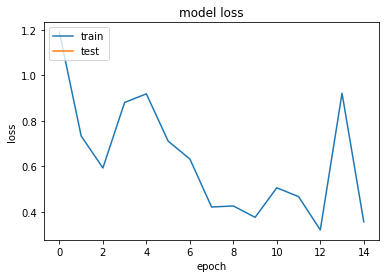

In [ ]:
PlotHistory(history)

In [ ]:
import tensorflow as tf
from keras.models import load_model

In [ ]:
# nao vou salvar sempre um modelo
model.save('hanseniase_VGG16-2022.12.10-final.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# save model

In [ ]:
#from keras.models import model_from_json
#model_json = model.to_json()
#with open("model-25epc-2022.11.15.json", "w") as json_file:
#  json_file.write(model_json)
#  model.save_weights("model-25epc-2022.11.15.h5")
#  print("Saved model e pesos to disk")

## Load Model

In [ ]:
#from keras.models import load_model
#import tensorflow as tf
#from keras.preprocessing import image

In [ ]:
#model2 = model_from_json(open("model-5epc-2022.11.14.json", "r").read())
#model2.load_weights('model-5epc-2022.11.14.h5')

## Imagenet

In [ ]:
#vgg16_model = VGG16(weights='imagenet')

In [ ]:
from PIL import Image

In [ ]:
img1='com/face-closeup-SIM/Image-082RM2-face-closeup.jpg'
img2='sem/Untitled71_20221024184821.png'
img3= arquivos_sem[10]
img4='com/face-closeup-SIM/Image-097DA4-face-closeup.jpg'
imgs = [img1, img2, img3, img4]

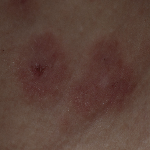

In [ ]:
imagem=load_img(img4, target_size=(150,150,3));
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 305ms/step
[[0.5688178]]


In [ ]:
class pred:
  def __init__(self, modelo):
    self.modelo = modelo
  def Xload_img(self,path):
    img = load_img(path, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img
  def predict_(self):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((150, 150), Image.ANTIALIAS)) #???? tira 20%
    plt.show()
    
    


    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    preds=[]
    for i ,img_path in enumerate(imgs):
        img = load_img(img_path, target_size= (150,150))     # era 224
        img = img_to_array(img)
        img = np.expand_dims(img,axis=0)
        pred = model.predict(img)
        if pred[0][0] < threshold :
          prediction = 'cat'
        else:
          prediction = 'dog'
        print (f'{prediction} : {pred[0][0]}')
        preds.append(pred)
    return(preds)
  pass

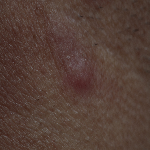

In [ ]:
imagem=load_img(img1, target_size=(150,150,3));
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 432ms/step
[[0.23256634]]


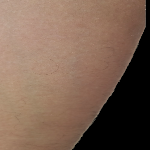

In [ ]:
imagem=load_img(img2, target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 337ms/step
[[0.53572094]]


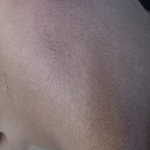

In [ ]:
imagem=load_img(img3, target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 288ms/step
[[0.58981234]]


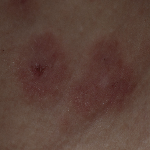

In [ ]:
imagem=load_img(img4, target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 283ms/step
[[0.5688178]]


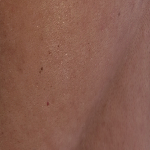

In [ ]:
imagem=load_img(arquivos_sem[0], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 278ms/step
[[0.5683783]]


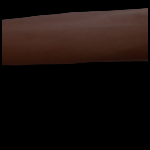

In [ ]:
imagem=load_img(arquivos_sem[1], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 20ms/step
[[0.73101765]]


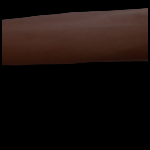

In [ ]:
imagem=load_img(arquivos_sem[1], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 19ms/step
[[0.73101765]]


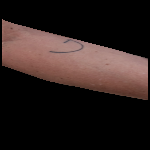

In [ ]:
imagem=load_img(arquivos_sem[2], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 27ms/step
[[0.97045624]]


# retreinando todo o modelo

In [ ]:
model.trainable = True
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy',    ## troquei
              metrics = ['accuracy'])     ### verificar     metrics=[keras.metrics.BinaryAccuracy()],

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10, #10,   #8  era 20
            epochs = 5,           # 25             #20  era 10
            validation_steps= 10, #10,   #6  era 10
            verbose = 1)

Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 0.8372 - accuracy: 0.7363 

10/10 [==============================] - 169s 16s/step - loss: 0.8372 - accuracy: 0.7363 - val_loss: 0.3720 - val_accuracy: 0.8889
Epoch 2/5
10/10 [==============================] - 132s 13s/step - loss: 0.5975 - accuracy: 0.7253
Epoch 3/5
10/10 [==============================] - 137s 13s/step - loss: 0.5360 - accuracy: 0.7582
Epoch 4/5
10/10 [==============================] - 151s 14s/step - loss: 0.4771 - accuracy: 0.8000
Epoch 5/5
10/10 [==============================] - 138s 13s/step - loss: 0.7197 - accuracy: 0.7473


In [ ]:
#score = model.evaluate_generator(validation_generator, verbose=0)
score = model.evaluate(validation_generator, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 15s 6s/step - loss: 0.4683 - accuracy: 0.8889

Test score: 0.4682518541812897
Test accuracy: 0.8888888955116272


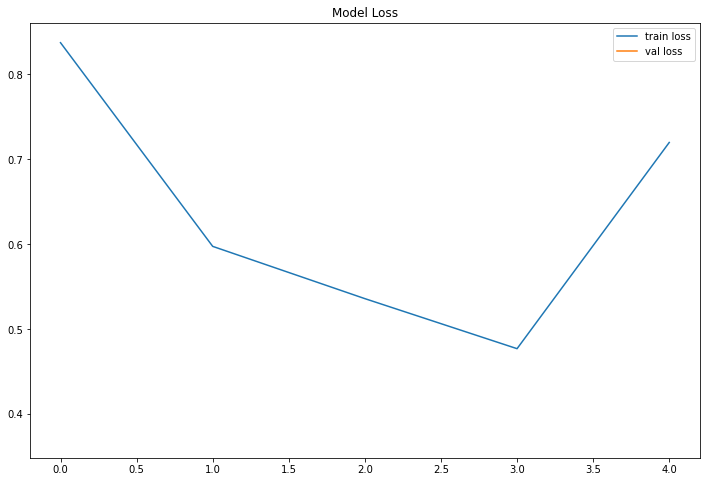

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.show()
plt.savefig('LossVal_loss')

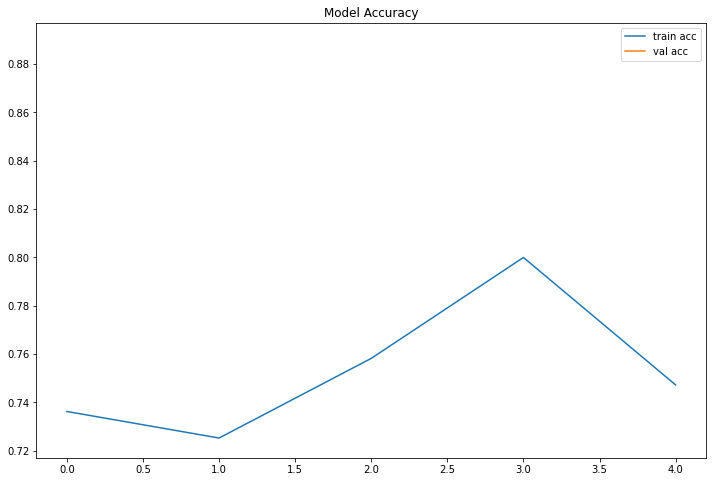

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
#with open("model-25epc-2022.11.15.json", "w") as json_file:
with open("model-25epc-2022.12.09.json", "w") as json_file:

  json_file.write(model_json)
  model.save_weights("modelFT-25epc-2022.12.10.h5")
  print("Saved model e pesos to disk")

Saved model e pesos to disk


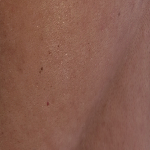

In [ ]:
imagem=load_img(arquivos_sem[0], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 396ms/step
[[0.39383182]]


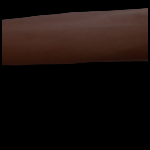

In [ ]:
imagem=load_img(arquivos_sem[1], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 256ms/step
[[0.53871924]]


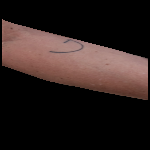

In [ ]:
imagem=load_img(arquivos_sem[2], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 259ms/step
[[0.95406616]]


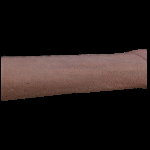

In [ ]:
imagem=load_img(arquivos_sem[3], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 275ms/step
[[0.74026954]]


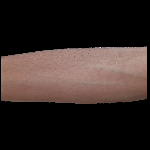

In [ ]:
imagem=load_img(arquivos_sem[4], target_size=(150,150,3));   # era 224
imagem

In [ ]:
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 256ms/step
[[0.86672914]]


In [ ]:
img1='com/face-closeup-SIM/Image-082RM2-face-closeup.jpg'
img2='sem/Untitled71_20221024184821.png'
img3='sem/WhatsApp21.20.26-3.jpeg'
img4='com/face-closeup-SIM/Image-097DA4-face-closeup.jpg'
imgs = [img1, img2, img3, img4]

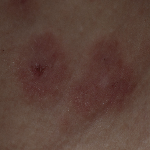

In [ ]:
imagem=load_img(img4, target_size=(150,150,3));   # era 224
imagem

In [ ]:
#pred(model).predict_()
imagem=np.array(imagem)
cls  = model.predict(imagem[np.newaxis,:,:,:]/255.)
print(cls)

1/1 [==============================] - 0s 276ms/step
[[0.37637565]]
